<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-Learning-Lab-2020/blob/emir/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






# placeholder: tensors are feeded externaly for example inputs tensors + output tensors

# variables : tensors represent the parameters of the network/graph ie. nn weights

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_outputs = 4
num_samples= 10
# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])

# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_outputs ]))

# model
y_p = tf.matmul(x, w_1)

# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
iter:  0 cost:  0.6879047
iter:  1 cost:  0.68631524
iter:  2 cost:  0.68473023
iter:  3 cost:  0.6831498
iter:  4 cost:  0.681574
iter:  5 cost:  0.6800027
iter:  6 cost:  0.6784364
iter:  7 cost:  0.67687476
iter:  8 cost:  0.67531794
iter:  9 cost:  0.6737662
predicted  [[-0.7650659   0.00451315  0.00786659  0.5631976 ]
 [-0.5296149   0.2853642  -0.4739438   0.69286066]
 [-1.3174443   0.00464206 -0.2609762   1.5602987 ]
 [-0.44987223  0.33479223 -0.11355152 -0.25863725]
 [-0.58847183  0.39806193 -0.39936644  0.29487485]
 [-0.12359159  0.4432073  -0.33676994 -0.31151545]
 [-0.53357214 -0.07495052  0.08453731  0.42268765]
 [-0.47955635  0.2855067  -0.2736042   0.228679  ]
 [ 0.07792095  0.9119682  -0.65320265 -0.98212945]
 [-0.77881306 -0.10078262  0.07784212  0.6918165 ]]
real  [[0.70952204 0.78983078 0.51656836 0.81312133]
 [0.43322909 0.14536171 0.23177686 0.3570239 ]
 [0.53496329 0.156025

In [3]:
sess = tf.Session() 
sess.run(init)
    
for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
print('predicted ', y_p_p)
print('real ', y_gr)

#sess.close()

iter:  0 cost:  1.5497437
iter:  1 cost:  1.5473305
iter:  2 cost:  1.5449209
iter:  3 cost:  1.5425149
iter:  4 cost:  1.5401127
iter:  5 cost:  1.5377144
iter:  6 cost:  1.5353199
iter:  7 cost:  1.5329292
iter:  8 cost:  1.5305426
iter:  9 cost:  1.5281599
predicted  [[ 0.7919632   0.81016856 -1.8356575   1.2828511 ]
 [-0.19975388  0.29692623 -0.92760223  0.536528  ]
 [ 0.43201846  0.61893326 -2.0028565   1.647118  ]
 [ 1.0835544   1.4074482  -2.5273604   1.2424406 ]
 [ 0.45294785  0.99143875 -2.0317495   1.0307344 ]
 [ 0.34437707  0.8684148  -1.4756199   0.49229777]
 [ 0.5792516   0.4888251  -1.1526108   0.88357246]
 [ 0.42447832  0.80478084 -1.6440432   0.8596892 ]
 [ 0.51570535  1.5627092  -2.4298751   0.547484  ]
 [ 0.71880275  0.61937195 -1.5435345   1.2164376 ]]
real  [[0.70952204 0.78983078 0.51656836 0.81312133]
 [0.43322909 0.14536171 0.23177686 0.3570239 ]
 [0.53496329 0.15602576 0.0090037  0.26408821]
 [0.88324248 0.88696179 0.69469661 0.69804211]
 [0.30550758 0.49625514 

In [ ]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [4]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_h1_n = 4
num_h2_n = 10
num_outputs = 4
#  O   O   O   O
#  O   O   O   O
#  O   O   O   O
#      O   O   O
#          O   
#          O   
#          O   
#          O   
#          O   
#          O   


num_samples= 10

# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])

# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))

#F(WX+b)
# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer

#placeholders/inputs:outpus --> Variables/Weights --> Model --> cost --> optimizer --> initilize all variables --> start the session

# cost
cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



iter:  0 cost:  1.3747197
iter:  1 cost:  1.3571972
iter:  2 cost:  1.3398707
iter:  3 cost:  1.3227433
iter:  4 cost:  1.305818
iter:  5 cost:  1.2890977
iter:  6 cost:  1.2725844
iter:  7 cost:  1.2562801
iter:  8 cost:  1.240186
iter:  9 cost:  1.224303
predicted  [[-0.49553448 -0.32934055  2.2853956   1.0342578 ]
 [-0.5915999  -0.12358764  2.2168155   0.8822452 ]
 [-0.5718505  -0.11707768  2.2199898   0.83789814]
 [-0.55210674 -0.02264899  2.192658    0.63888586]
 [-0.5430312  -0.12619165  2.21796     0.7780385 ]
 [-0.442331   -0.2704625   2.2880855   0.86878955]
 [-0.50752854 -0.22720224  2.2534919   0.8841039 ]
 [-0.54281336  0.03235716  2.1785827   0.5345362 ]
 [-0.4952021  -0.12381646  2.230531    0.7026081 ]
 [-0.5234042  -0.2988435   2.2742784   1.0374424 ]]
real  [[0.45240918 0.83295494 0.31481309 0.79053004]
 [0.1816843  0.09955046 0.4485272  0.87439565]
 [0.97557775 0.25179652 0.49892242 0.50017244]
 [0.23076734 0.78193309 0.6157077  0.26782214]
 [0.30728375 0.42175732 0.8

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

(55000, 784)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


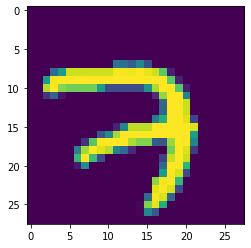

In [5]:
%matplotlib inline

from matplotlib.pyplot import imshow

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

display(mnist.train.images.shape) # 28*28 = 784

image =mnist.train.images[0].reshape((28,28))
#MNIST data input (img shape: 28*28)
imshow(image)

print(mnist.train.labels[0])

In [6]:
import time 
tic = time.clock()


In [7]:
import tensorflow as tf

# training data
X_train = mnist.train.images
Y_train = mnist.train.labels

# testing data
X_test = mnist.test.images
Y_test = mnist.test.labels

# training data
X_val = mnist.validation.images
Y_val = mnist.validation.labels


# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 784
num_h1_n = 100
num_h2_n = 100
num_outputs = 10



# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost


# Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))

## 3 images, y_p=[[0.1,0.0,0,0.9],[0.9,0.1,0,0.],[0,0.9,0,0.1]] 

# tf.argmax(y_p, 1) [3,0,1] 

# 3 images, y=[[0,0.0,0,1],[0,1,0,0],[0,1,0,0]] 

# tf.argmax(y, 1) [3,1,1]

# tf.equal [True,False,True]--[1,0,1]--- 2/3 

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()
tic = time.clock()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    

        train_cost, train_acc  = sess.run([cost,accuracy], feed_dict={x: batch_x,y: batch_y})
    
        
        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        test_cost, test_acc  = sess.run([cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )

    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    #print('predicted ', y_p_p)
    #print('real ', y_gr)



toc = time.clock()
toc-tic

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

iter:  0 train_cost:  6.8561287 train_acc:  0.140625 test_cost:  6.819843 test_acc:  0.1328125
iter:  1 train_cost:  5.9924164 train_acc:  0.171875 test_cost:  7.004061 test_acc:  0.1328125
iter:  2 train_cost:  6.9703116 train_acc:  0.0703125 test_cost:  6.2818594 test_acc:  0.1328125
iter:  3 train_cost:  6.728799 train_acc:  0.109375 test_cost:  6.56114 test_acc:  0.171875
iter:  4 train_cost:  6.2838235 train_acc:  0.1796875 test_cost:  5.662182 test_acc:  0.1875
iter:  5 train_cost:  5.71724 train_acc:  0.1953125 test_cost:  6.6707525 test_acc:  0.09375
iter:  6 train_cost:  5.3714666 train_acc:  0.15625 test_cost:  6.179183 test_acc:  0.140625
iter:  7 train_cost:  5.3649054 train_acc:  0.1875 test_cost:  5.652121 test_acc:  0.1640625
iter:  8 train_cost:  5.6931667 train_acc:  0.171875 test_

10.167191

In [ ]:
# 10.579477999999998 TPU
# 10.682025999999999 CPU
# 8.640348 GPU 


# CNN using Tensorflow




In [ ]:
n_classes=10
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # x input image, W..weights is a tamplate(3d matrix for images),
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    print('con1_before max',conv1.get_shape().as_list())

    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=1)
    print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    print('con2_before max',conv2.get_shape().as_list())

    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=1)
    print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p = conv_net(x, weights, biases)

#crossentropy cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost


# Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    

        train_cost, train_acc  = sess.run([cost,accuracy], feed_dict={x: batch_x,y: batch_y})
    
        
        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        test_cost, test_acc  = sess.run([cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )

    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



con1_before max [None, 28, 28, 32]
con1_after max [None, 28, 28, 32]
con2_before max [None, 28, 28, 64]
con2_after max [None, 28, 28, 64]


InvalidArgumentError: ignored